In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This sets all the initial variables

In [2]:
df = pd.read_parquet('BOQ_data.parquet')
start = min(df['DATE'])
dates = df['DATE'].unique()
data = {}
dates = sorted(dates)

In [14]:
data = {}

BIG LOOP

In [15]:
currAccValue = 0
AccValues = []
positions = {}
Pnl = []
# perm: num of stocks bought
cash = 10000
for date in dates:
    buy = []
    sell = []
    #lists for holding the permnos of the companies that we will buy and sell
    currMonthData = df[df['DATE'] == date]
    for perm in currMonthData.values:
        name = f'{perm[18]}'
        price = perm[19]
        if data.get(name):
            #updating our own metrics for each company
            curr = data[name]
            curr['price'].append(price)
            curr['month change'] = price/curr['price'][-2] -1
            if len(curr['price']) > 3:
                curr['3month change'] = price/curr['price'][-4] - 1
                if len(curr['price']) > 6:
                    curr['6month change'] = price/curr['price'][-7] - 1
            #adding to buy or sell if hitting certain signals
            if (curr['month change'] < 0) and ():
                buy.append(name)
            elif (curr['month change'] > 0):
                sell.append(name)
        else:
            data[name] = {'price':[price]}
    # buying and selling the permnos in the lists made from each iteration
    for per in sell:
        if positions.get(per):
            if not np.isnan(data[per]['price'][-1]):
                sold = positions.pop(per)
                cash += data[per]['price'][-1]*sold
        else:
            positions[per] = -1
            cash += data[per]['price'][-1]
    for per in buy:
        if cash > data[per]['price'][-1] and not np.isnan(data[per]['price'][-1]) :
            if positions.get(per):
                if positions[per]>0:
                    positions[per] += 1
                    cash-= data[per]['price'][-1]
                else:
                    cash-= data[per]['price'][-1]*(1-positions[per])
                    positions[per] = 1-positions[per]
            else:
                positions[per] = 1
                cash -= data[per]['price'][-1]
    currAccValue = 0
    # gets the current value of all the positions after each iteration on the dates
    for key,val in positions.items():
        if not np.isnan(data[key]['price'][-1]):
            currAccValue += data[key]['price'][-1]*val 
        else:
            x = 2
            while x<len(data[key]['price']):
                if not np.isnan(data[key]['price'][-x]):
                    currAccValue += data[key]['price'][-x]*val
                    break
                else:
                    x+=1
    currAccValue +=cash
    AccValues.append(currAccValue)
    Pnl.append(currAccValue-10000)

get the column index for a identifier

In [13]:
cols = df.columns.values
inp = input(f'{cols}   which name?')
def get_index(name):
    count = 0
    it = iter(cols)
    while name!=next(it):
        count+=1
        if count == 85:
            count+=1
            break
    return count
print(get_index(inp))

32


In [16]:
returns = np.diff(AccValues) / AccValues[:-1]
mean_return = np.mean(returns)
std_dev = np.std(returns)
sharpe_ratio = (mean_return - 0.03 / 12) / std_dev
sharpe_ratio

-0.026534445775763926

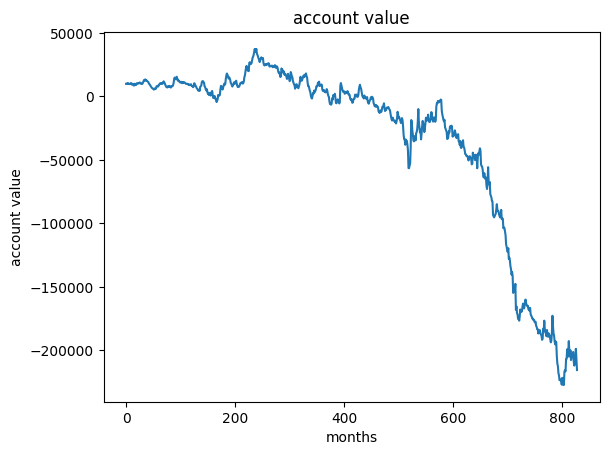

-32.67542496465848

In [17]:
plt.plot(np.arange(len(AccValues)),AccValues)
plt.xlabel('months')
plt.ylabel('account value')
plt.title('account value')
plt.show()
(currAccValue/10000 -1)*100/len(AccValues)*12